### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bread basket.csv")

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [5]:
df.info() # missing values check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
# Converting date time to correct format
df["date_time"] = pd.to_datetime(df['date_time'])

In [7]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [8]:
# Count of unique customer
df['Transaction'].nunique()

9465

In [9]:
# Extracting date and time
df['date'] = df['date_time'].dt.date

In [10]:
# Extracting time
df['time'] = df['date_time'].dt.time

In [11]:
# Extracting hour
df['hour'] = df['date_time'].dt.hour

In [12]:
# Finding unique hours
df['hour'].unique()

array([ 9, 10, 11, 12, 13, 14,  8, 15, 17, 18,  7, 16, 19, 20, 21,  1, 23,
       22], dtype=int64)

In [13]:
# Replacing hours with text
hour_in_num = (1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
hour_in_obj = ('1-2', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

In [14]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,9-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11


In [15]:
# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month

In [16]:
df['month'].unique()

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12], dtype=int64)

In [17]:
df['month'] = df['month'].replace((1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [18]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,hour,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,9-10,Oct
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11,Oct
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11,Oct
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11,Oct
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11,Oct


In [19]:
# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday

In [20]:
df['weekday'].unique()

array([6, 0, 3, 4, 2, 5, 1], dtype=int64)

In [21]:
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))

In [22]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,hour,month,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,9-10,Oct,Sun
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun


In [23]:
# dropping date_time column
df.drop('date_time', axis= 1, inplace = True)

In [24]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,hour,month,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,9-10,Oct,Sun
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun
4,3,Jam,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun


In [25]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [26]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,hour,month,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,9-10,Oct,Sun
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,Oct,Sun
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun
4,3,jam,morning,weekend,2016-10-30,10:07:00,10-11,Oct,Sun


In [27]:
df['Item'].nunique()

94

### Data in Visual

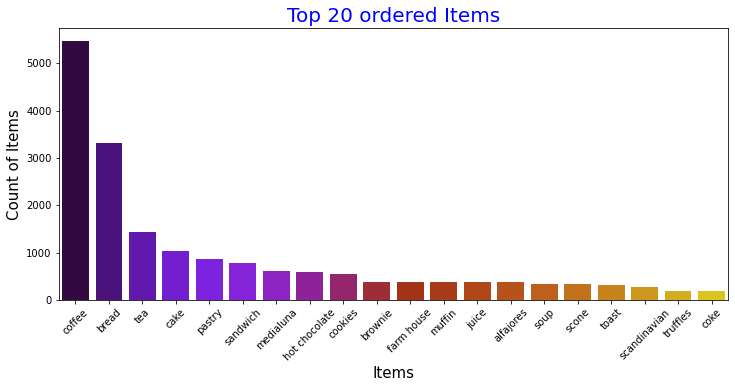

In [28]:
# Top 20 ordered items

plt.figure(figsize=(12,5))
sns.barplot(x = df.Item.value_counts().head(20).index, 
            y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation = 45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 ordered Items', color = 'blue', size = 20)
plt.show()
# Coffee has been ordered more.

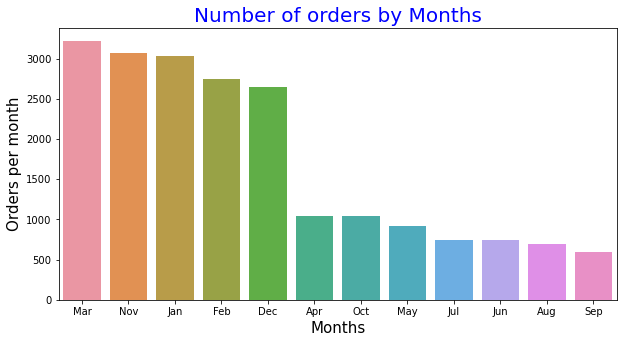

In [36]:
monthTrans = df.groupby('month')['Transaction'].count().reset_index()
monthTrans = monthTrans.sort_values(by = 'Transaction', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data = monthTrans, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders by Months', color = 'blue', size = 20)
plt.show()